In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
unfiltered_targets = pd.read_csv("/home/sdejong/skinstression/data/targets.csv", index_col="index")

df_mean_std_per_fold = pd.DataFrame(columns=["a_mean", "a_std", "k_mean", "k_std", "xc_mean", "xc_std"])
df_mean_std_per_fold.index.name = "fold"

for fold in np.arange(1, 6):
    print(f"fold {fold}")
    splits_path = f"/home/sdejong/skinstression/data/splits/fold-{fold}-split-train.csv"
    selected_targets = pd.read_csv(splits_path, index_col="index").index
    targets = unfiltered_targets.loc[selected_targets]

    for i, var in enumerate(["a", "k", "xc"]):

        mean = targets[var].mean()
        std = targets[var].std()
        print(f"{var}: {mean=}, {std=}")

        df_mean_std_per_fold.at[fold, f"{var}_mean"] = mean
        df_mean_std_per_fold.at[fold, f"{var}_std"] = std

print(df_mean_std_per_fold)
df_mean_std_per_fold.to_csv("/home/sdejong/skinstression/data/splits/mean_std_per_fold.csv", index="fold")

fold 1
a: mean=3.8103177043244214, std=3.3450981056172124
k: mean=25.04108539953597, std=6.287714583546716
xc: mean=1.2531168365210306, std=0.07219568700783337
fold 2
a: mean=3.9250335493426505, std=3.1426745019913493
k: mean=23.810847599975855, std=6.336919850651474
xc: mean=1.2594310288178006, std=0.07599955349891138
fold 3
a: mean=3.738087873352394, std=3.046049273077366
k: mean=23.279458447600256, std=4.963266952581578
xc: mean=1.2553625962203572, std=0.07430385169156206
fold 4
a: mean=4.01966243392055, std=3.39911928863025
k: mean=24.68629218597078, std=6.375912724723693
xc: mean=1.2610465309803551, std=0.07613572838157144
fold 5
a: mean=4.223302168880209, std=3.4193924595002025
k: mean=23.534311441935284, std=6.418862916811932
xc: mean=1.258186531694053, std=0.06495990177712878
        a_mean     a_std     k_mean     k_std   xc_mean    xc_std
fold                                                             
1     3.810318  3.345098  25.041085  6.287715  1.253117  0.072196
2     3

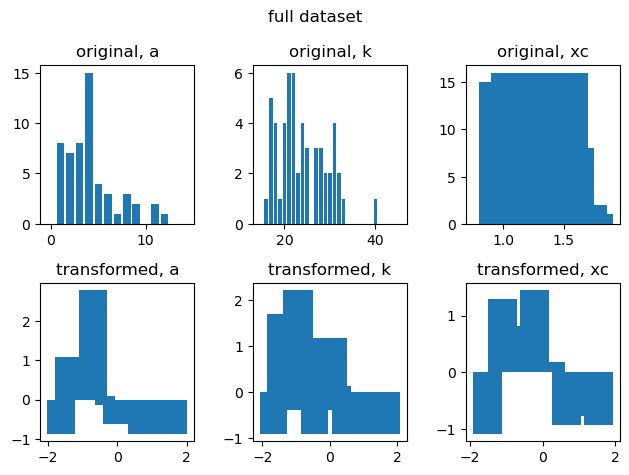

In [18]:
targets = pd.read_csv("/home/sdejong/skinstression/data/targets.csv", index_col="index")
edges = {"a": np.arange(0, 15, 1), "k": np.arange(15, 45.5, 1), "xc": np.arange(1.15, 1.5, 0.05)}
for i, var in enumerate(["a", "k", "xc"]):
    labels = targets[var].to_numpy()
    bin_index_per_label = np.digitize(labels, edges[var])
    emp_label_dist = np.bincount(bin_index_per_label, minlength=len(edges[var]))

    if len(emp_label_dist) != len(edges[var]):
        emp_label_dist = emp_label_dist[:-1]

    dist = np.stack([edges[var], emp_label_dist]).T

    transformer = StandardScaler()
    transformer.fit(dist)
    dist_t = transformer.transform(dist)

    plt.subplot(2, 3, i + 1)
    plt.title(f"original, {var}")
    plt.bar(*dist.T)

    plt.subplot(2, 3, i + 4)
    plt.title(f"transformed, {var}")
    plt.bar(*dist_t.T)

plt.suptitle("full dataset")
plt.tight_layout()
plt.show()

a: transformer.scale_=array([4.3204938 , 2.17460086]), transformer.mean_=array([7.        , 2.06666667])
k: transformer.scale_=array([8.94427191, 1.21814243]), transformer.mean_=array([30.,  1.])
xc: transformer.scale_=array([0.11456439, 3.67423461]), transformer.mean_=array([1.325, 4.   ])


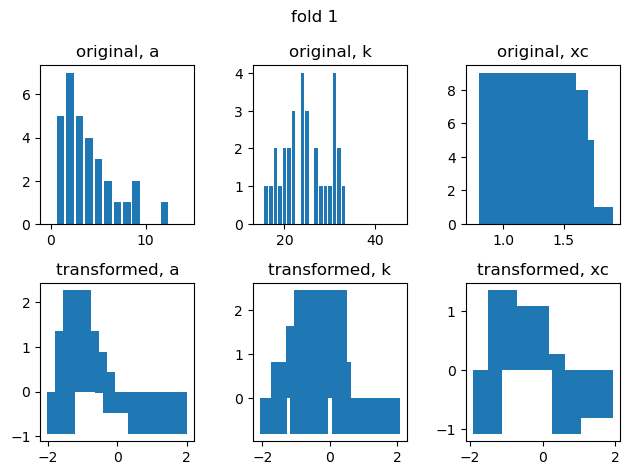

a: transformer.scale_=array([4.3204938 , 2.21710522]), transformer.mean_=array([7.        , 2.13333333])
k: transformer.scale_=array([8.94427191, 1.3315979 ]), transformer.mean_=array([30.        ,  1.03225806])
xc: transformer.scale_=array([0.11456439, 3.85478599]), transformer.mean_=array([1.325, 4.125])


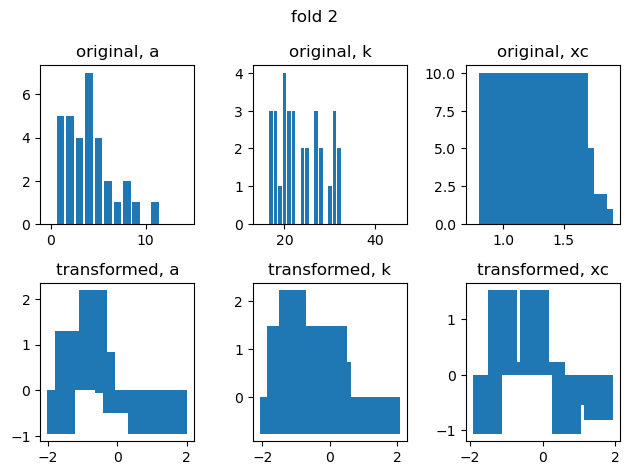

a: transformer.scale_=array([4.3204938 , 2.19696761]), transformer.mean_=array([7. , 2.2])
k: transformer.scale_=array([8.94427191, 1.2683615 ]), transformer.mean_=array([30.        ,  1.06451613])
xc: transformer.scale_=array([0.11456439, 4.01364859]), transformer.mean_=array([1.325, 4.125])


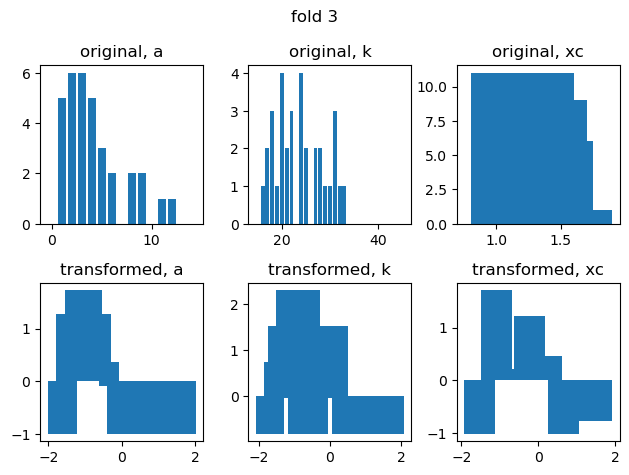

a: transformer.scale_=array([4.3204938 , 2.39072281]), transformer.mean_=array([7.        , 2.13333333])
k: transformer.scale_=array([8.94427191, 1.25682321]), transformer.mean_=array([30.        ,  1.03225806])
xc: transformer.scale_=array([0.11456439, 3.51559028]), transformer.mean_=array([1.325, 4.125])


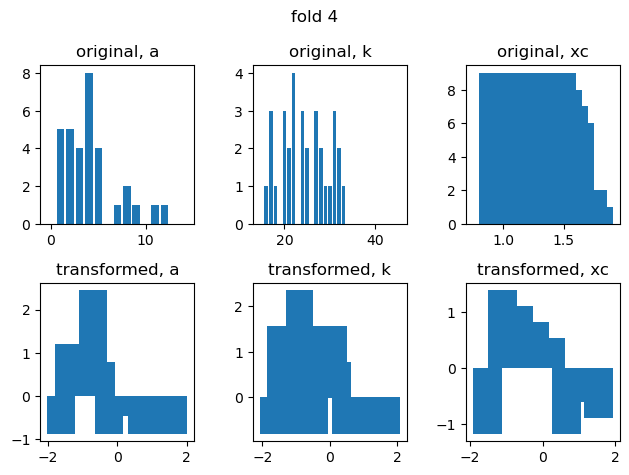

a: transformer.scale_=array([4.3204938 , 2.27644948]), transformer.mean_=array([7.        , 2.13333333])
k: transformer.scale_=array([8.94427191, 1.25682321]), transformer.mean_=array([30.        ,  1.03225806])
xc: transformer.scale_=array([0.11456439, 3.88707795]), transformer.mean_=array([1.325, 4.125])


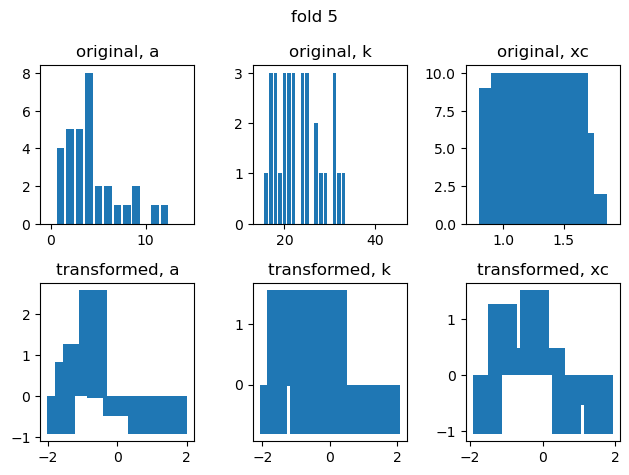

In [29]:
import sklearn
sklearn.set_config(enable_metadata_routing=True)

for fold in np.arange(1, 6):
    splits_path = f"/home/sdejong/skinstression/data/splits/fold-{fold}-split-train.csv"
    unfiltered_targets = pd.read_csv("/home/sdejong/skinstression/data/targets.csv", index_col="index")
    selected_targets = pd.read_csv(splits_path, index_col="index").index
    targets = unfiltered_targets.loc[selected_targets]
    edges = {"a": np.arange(0, 15, 1), "k": np.arange(15, 45.5, 1), "xc": np.arange(1.15, 1.5, 0.05)}

    for i, var in enumerate(["a", "k", "xc"]):
        labels = targets[var].to_numpy()
        bin_index_per_label = np.digitize(labels, edges[var])
        emp_label_dist = np.bincount(bin_index_per_label, minlength=len(edges[var]))

        if len(emp_label_dist) != len(edges[var]):
            emp_label_dist = emp_label_dist[:-1]

        dist = np.stack([edges[var], emp_label_dist]).T

        transformer = StandardScaler()
        transformer.fit(dist)
        dist_t = transformer.transform(dist)
        print(f"{var}: {transformer.scale_=}, {transformer.mean_=}")

        plt.subplot(2, 3, i + 1)
        plt.title(f"original, {var}")
        plt.bar(*dist.T)

        plt.subplot(2, 3, i + 4)
        plt.title(f"transformed, {var}")
        plt.bar(*dist_t.T)

    plt.suptitle(f"fold {fold}")
    plt.tight_layout()
    plt.show()